# <font color = red> Machine learning

<center>
<img src = "IA_and_Datascience.png" width = "400">
</center>

<center>
<img src = "AI_VennDiagram_v2.png" width = "400">
</center>



<center>
<img src = "Machine learning clasificacion.png" width = "400">
</center>

<center>
<img src = "Tipos Machine Learning.png" width = "400">
</center>




## <font color = darkblue> Clasificación

La clasificación es un método de machine learning supervisado en el que el modelo intenta prever la etiqueta correcta de unos datos de entrada dados. En la clasificación, el modelo se entrena completamente con los datos de entrenamiento y, luego, se evalúa con los datos de prueba antes de utilizarse para realizar previsiones con nuevos datos no vistos.

Algunos aspectos relevantes del dataset avocado.csv son:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - The year
* Region - The city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold
* Total Bags - Total Number of Bags sold
* Small Bags - Total Number of Small Bags sold
* Large Bags - Total Number of Large Bags sold
* XLarge Bags	- Total Number of XLarge Bags sold


El problema que se quiere resolver de este dataset es de clasificación. El dataset presenta el consumo de aguacate en regiones de Estados Unidos de América desde el 2015 al 2018. Las clases que se quieren predecir son el convencional y el orgánico.

## Importar los paquetes necesarios para trabajar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings                                                                 

## Vamos a leer el dataset avocado e ignorar los warnings

In [2]:
warnings.filterwarnings('ignore') 
datos = pd.read_csv('avocado.csv',
                 sep = ',', 
                 index_col = 0,
                 parse_dates = ['Date']) 
datos

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Cambiar los nombres de las columnas

In [3]:
datos = datos.rename(columns= {'4046':'PLU 4046 venta',
                                '4225':'PLU 4225 venta',
                                '4770':'PLU 4770 venta',
                                'Total Volume':'Aguacates_vendidos',
                                'AveragePrice':'Precio_promedio',
                                'Total Bags':'Bolsas_Totales',
                                'Small Bags':'Bolsas_chicas',
                                'Large Bags':'Bolsas_grandes',
                                'XLarge Bags':'Bolsas_extragrandes',
                                'type':'tipo',
                                'Date':'Fecha'})
datos.columns.values

array(['Fecha', 'Precio_promedio', 'Aguacates_vendidos', 'PLU 4046 venta',
       'PLU 4225 venta', 'PLU 4770 venta', 'Bolsas_Totales',
       'Bolsas_chicas', 'Bolsas_grandes', 'Bolsas_extragrandes', 'tipo',
       'year', 'region'], dtype=object)

## Ver los tipos de datos

In [4]:
datos.dtypes

Fecha                  datetime64[ns]
Precio_promedio               float64
Aguacates_vendidos            float64
PLU 4046 venta                float64
PLU 4225 venta                float64
PLU 4770 venta                float64
Bolsas_Totales                float64
Bolsas_chicas                 float64
Bolsas_grandes                float64
Bolsas_extragrandes           float64
tipo                           object
year                            int64
region                         object
dtype: object

## Obtener los estadísticos del dataset

In [5]:
datos.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha,18249,2016-08-13 23:30:43.498273792,2015-01-04 00:00:00,2015-10-25 00:00:00,2016-08-14 00:00:00,2017-06-04 00:00:00,2018-03-25 00:00:00,NaN
Precio_promedio,18249.0,1.405978,0.44,1.1,1.37,1.66,3.25,0.402677
Aguacates_vendidos,18249.0,850644.013009,84.56,10838.58,107376.76,432962.29,62505646.52,3453545.355399
PLU 4046 venta,18249.0,293008.424531,0.0,854.07,8645.3,111020.2,22743616.17,1264989.081763
PLU 4225 venta,18249.0,295154.568356,0.0,3008.78,29061.02,150206.86,20470572.61,1204120.401135
PLU 4770 venta,18249.0,22839.735993,0.0,0.0,184.99,6243.42,2546439.11,107464.068435
Bolsas_Totales,18249.0,239639.20206,0.0,5088.64,39743.83,110783.37,19373134.37,986242.399216
Bolsas_chicas,18249.0,182194.686696,0.0,2849.42,26362.82,83337.67,13384586.8,746178.514962
Bolsas_grandes,18249.0,54338.088145,0.0,127.47,2647.71,22029.25,5719096.61,243965.964547
Bolsas_extragrandes,18249.0,3106.426507,0.0,0.0,0.0,132.5,551693.65,17692.894652


## Verificar si existen datos faltantes

In [6]:
# Con esto se suman los datos faltantes
datos.isnull().sum()

Fecha                  0
Precio_promedio        0
Aguacates_vendidos     0
PLU 4046 venta         0
PLU 4225 venta         0
PLU 4770 venta         0
Bolsas_Totales         0
Bolsas_chicas          0
Bolsas_grandes         0
Bolsas_extragrandes    0
tipo                   0
year                   0
region                 0
dtype: int64

## Quitar la columna Fecha 

In [7]:
datos = datos.drop(columns=['Fecha'],axis=1)
datos.head()

,Precio_promedio,Aguacates_vendidos,PLU 4046 venta,PLU 4225 venta,PLU 4770 venta,Bolsas_Totales,Bolsas_chicas,Bolsas_grandes,Bolsas_extragrandes,tipo,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Cambiar el orden de las columnas


In [8]:
datos.columns.values

array(['Precio_promedio', 'Aguacates_vendidos', 'PLU 4046 venta',
       'PLU 4225 venta', 'PLU 4770 venta', 'Bolsas_Totales',
       'Bolsas_chicas', 'Bolsas_grandes', 'Bolsas_extragrandes', 'tipo',
       'year', 'region'], dtype=object)

In [9]:
datos = datos[['Precio_promedio', 'Aguacates_vendidos', 'PLU 4046 venta',
       'PLU 4225 venta', 'PLU 4770 venta', 'Bolsas_Totales',
       'Bolsas_chicas', 'Bolsas_grandes', 'Bolsas_extragrandes', 
       'year', 'region','tipo']]

## Contar por tipo

In [10]:
datos.groupby("tipo").count()["Precio_promedio"]

tipo
conventional    9126
organic         9123
Name: Precio_promedio, dtype: int64

In [11]:
datos.groupby("region").count()["Precio_promedio"]

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

## Precio promedio por tipo

In [12]:
datos.groupby('tipo').mean(["Precio_promedio"])["Precio_promedio"]

tipo
conventional    1.158040
organic         1.653999
Name: Precio_promedio, dtype: float64

## Histograma de los precios

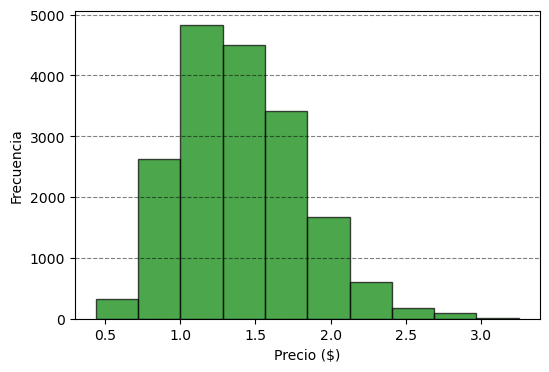

In [13]:
plt.figure(figsize = (6,4))
plt.hist(datos["Precio_promedio"], bins = 10, color = "green", edgecolor = "black", alpha = 0.7)
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(axis = "y", linestyle = '--', color = "black", alpha = 0.5)
plt.show()

## Boxplot de los precios por tipo

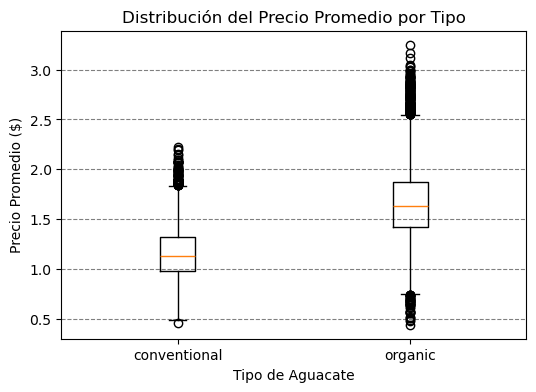

In [14]:
plt.figure(figsize=(6, 4))
plt.boxplot([datos[datos["tipo"] == tipo]["Precio_promedio"] for tipo in datos["tipo"].unique()],
            labels=datos["tipo"].unique())

# Personalización del gráfico
plt.xlabel('Tipo de Aguacate')
plt.ylabel('Precio Promedio ($)')
plt.title('Distribución del Precio Promedio por Tipo')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.5)
plt.show()

## Cambiar de variables categoricas a numericas

In [15]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
datos['region'] = Encoder.fit_transform(datos['region'])
datos['tipo'] = Encoder.fit_transform(datos['tipo'])
datos.dtypes

Precio_promedio        float64
Aguacates_vendidos     float64
PLU 4046 venta         float64
PLU 4225 venta         float64
PLU 4770 venta         float64
Bolsas_Totales         float64
Bolsas_chicas          float64
Bolsas_grandes         float64
Bolsas_extragrandes    float64
year                     int64
region                   int32
tipo                     int32
dtype: object

## Scatter plot por tipo

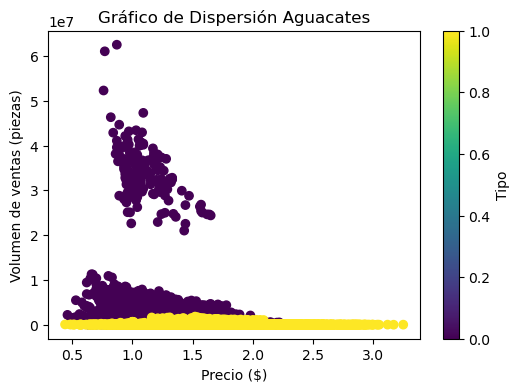

In [18]:
x = datos["Precio_promedio"]
y = datos["Aguacates_vendidos"]
colors = datos["tipo"]

plt.figure(figsize = (6,4))
plt.scatter(x, y, c=colors, cmap='viridis')
plt.title("Gráfico de Dispersión Aguacates")

# Etiquetas para los ejes
plt.xlabel('Precio ($)')
plt.ylabel('Volumen de ventas (piezas)')

# Barra de colores para interpretar los valores
plt.colorbar(label='Tipo')

plt.show()

## Tomar las variables descriptoras y la variable de respuesta y convertirlas a numpy

In [16]:
N, M = datos.shape

X = datos.iloc[:,0:M-1]
y = datos.iloc[:,-1]

X = X.to_numpy()
y = y.to_numpy()

## Estandarizar

In [17]:
from sklearn.preprocessing import StandardScaler

# Estandarización
scaler = StandardScaler()
X_estandar = scaler.fit_transform(X)



array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.17557961,
        -1.22128204, -1.7002522 ],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.17557961,
        -1.22128204, -1.7002522 ],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.17557961,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ..., -0.17557961,
         1.97050371,  1.70081131],
       [ 1.30138182, -0.24162464, -0.2304279 , ..., -0.17557961,
         1.97050371,  1.70081131],
       [ 0.53151208, -0.24125273, -0.22934712, ..., -0.17557961,
         1.97050371,  1.70081131]])

## Dividir los datos en entrenamiento y prueba

<center>
    <img src = "TrainTestRepeat.png" width = "400">
</center>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_estandar, y, test_size=0.2, random_state=42)

## Importar clasificadores y metricas
<center>
    <img src = "confusion_matix_example.png" width = 400">
</center>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Regresión Logística

<center>
    <img src = "logistic_regresion.png" width = "400">
</center>

In [23]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# 1. Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.4f}")

# 2. Reporte de clasificación (Precision, Recall, F1-Score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión (Accuracy): 0.9189

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1820
           1       0.90      0.94      0.92      1830

    accuracy                           0.92      3650
   macro avg       0.92      0.92      0.92      3650
weighted avg       0.92      0.92      0.92      3650


Matriz de Confusión:
[[1625  195]
 [ 101 1729]]


## Naives Bayes
<center>
    <img src = "Naives_Bayes.jpg" width = "400">
</center>

In [24]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

# 1. Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.4f}")

# 2. Reporte de clasificación (Precision, Recall, F1-Score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión (Accuracy): 0.8690

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1820
           1       0.80      0.98      0.88      1830

    accuracy                           0.87      3650
   macro avg       0.89      0.87      0.87      3650
weighted avg       0.89      0.87      0.87      3650


Matriz de Confusión:
[[1384  436]
 [  42 1788]]


## SVM
<center>
    <img src = "SVM.png" width = "400">
</center>


In [25]:
sv = SVC()

sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)

# 1. Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.4f}")

# 2. Reporte de clasificación (Precision, Recall, F1-Score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión (Accuracy): 0.9422

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1820
           1       0.92      0.97      0.94      1830

    accuracy                           0.94      3650
   macro avg       0.94      0.94      0.94      3650
weighted avg       0.94      0.94      0.94      3650


Matriz de Confusión:
[[1665  155]
 [  56 1774]]
